#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Reading the csv file

In [2]:
obj_1 = pd.read_csv("C:\\Appuzzz\\University\\Sem 2\\Esports\\R6\\original_site\\datadump_S5_summary_objectives\\S5_summary_objectives.csv",encoding='cp1252')

In [3]:
obj_1.head()

platform    dateid    gamemode mapname              objectivelocation  \
0       PC  20170210  PvP – BOMB    BANK  EXECUTIVE LOUNGE / CEO OFFICE   
1       PC  20170210  PvP – BOMB    BANK  EXECUTIVE LOUNGE / CEO OFFICE   
2       PC  20170210  PvP – BOMB    BANK  EXECUTIVE LOUNGE / CEO OFFICE   
3       PC  20170210  PvP – BOMB    BANK  EXECUTIVE LOUNGE / CEO OFFICE   
4       PC  20170210  PvP – BOMB    BANK  EXECUTIVE LOUNGE / CEO OFFICE   

  skillrank      role       operator  nbwins  nbkills  nbdeaths  nbpicks  
0    Bronze  Attacker  G.E.O.-JACKAL       0        0         1        1  
1    Bronze  Attacker  GIGN-MONTAGNE       1        0         2        3  
2    Bronze  Attacker        GSG9-IQ       0        0         1        1  
3    Bronze  Attacker      JTF2-BUCK       0        0         1        1  
4    Bronze  Attacker   SAS-THATCHER       0        0         1        1

In [4]:
#Selecting only the required attribtues
ques_1 = obj_1.groupby(['mapname','role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

C:\Users\appu\AppData\Local\Temp/ipykernel_11548/3452716100.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ques_1 = obj_1.groupby(['mapname','role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()


In [5]:
ques_1.head()

mapname      role       operator  nbwins  nbkills  nbdeaths  nbpicks
0    BANK  Attacker   BOPE-CAPITAO    1991     2908      3344     4515
1    BANK  Attacker  G.E.O.-JACKAL    7658    12798     12048    16821
2    BANK  Attacker  GIGN-MONTAGNE    3081     2737      5280     7259
3    BANK  Attacker   GIGN-RESERVE      65       56       136      174
4    BANK  Attacker    GIGN-TWITCH    7111    10735     11043    15945

In [6]:
#Calculating the kill ratio
ques_1['kd_ratio'] = pd.to_numeric(ques_1['nbkills']) / pd.to_numeric(ques_1['nbdeaths'])

In [7]:
ques_1.head()

mapname      role       operator  nbwins  nbkills  nbdeaths  nbpicks  \
0    BANK  Attacker   BOPE-CAPITAO    1991     2908      3344     4515   
1    BANK  Attacker  G.E.O.-JACKAL    7658    12798     12048    16821   
2    BANK  Attacker  GIGN-MONTAGNE    3081     2737      5280     7259   
3    BANK  Attacker   GIGN-RESERVE      65       56       136      174   
4    BANK  Attacker    GIGN-TWITCH    7111    10735     11043    15945   

   kd_ratio  
0  0.869617  
1  1.062251  
2  0.518371  
3  0.411765  
4  0.972109

In [8]:
# Creating the color pallette
cmap = sns.diverging_palette(250,40, as_cmap=True)
#cmap = sns.diverging_palette(165, 2, s=80, l=55, n=9, as_cmap=True)
#cmap = sns.blend_palette(["dodgerblue", ".95", "crimson"], 9)
#cmap = sns.diverging_palette(250, 30, s=75, l=40,n=9, center="dark", as_cmap = True)
ques_1_role = ques_1.groupby('role')

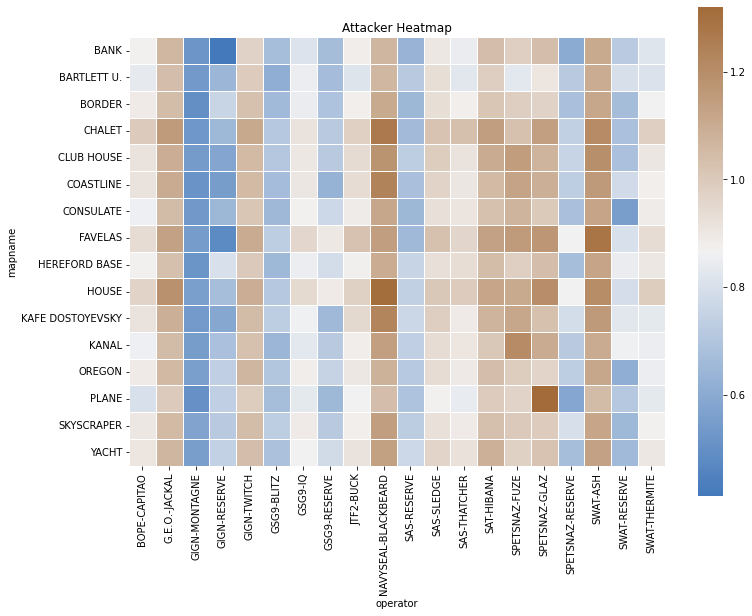

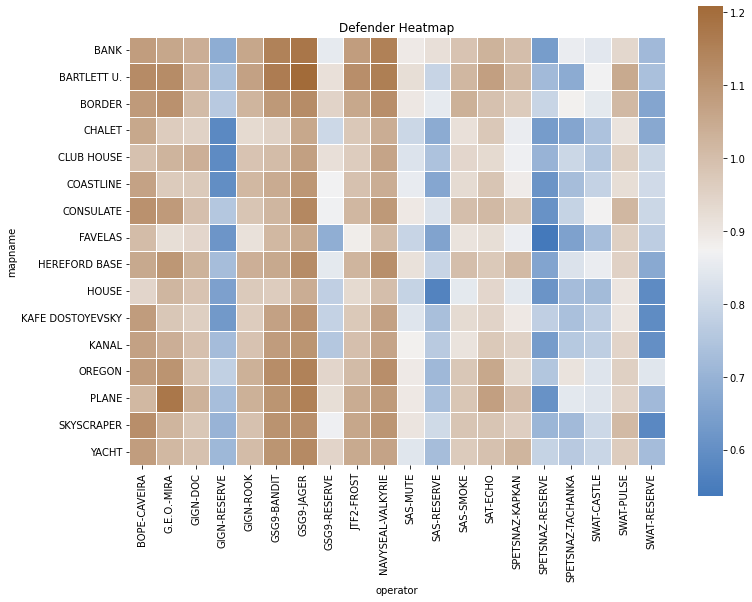

In [9]:
# Plotting the heat map
for role, tbl in ques_1_role:
    pivot = tbl.pivot(index='mapname', columns='operator', values='kd_ratio')
    f, ax = plt.subplots(figsize=(12,9))
    plt.title(role + ' Heatmap')
    sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [10]:
#Checking for the operators to delete the reserve operators
ques_1.operator.unique()

array(['BOPE-CAPITAO', 'G.E.O.-JACKAL', 'GIGN-MONTAGNE', 'GIGN-RESERVE',
       'GIGN-TWITCH', 'GSG9-BLITZ', 'GSG9-IQ', 'GSG9-RESERVE',
       'JTF2-BUCK', 'NAVYSEAL-BLACKBEARD', 'SAS-RESERVE', 'SAS-SLEDGE',
       'SAS-THATCHER', 'SAT-HIBANA', 'SPETSNAZ-FUZE', 'SPETSNAZ-GLAZ',
       'SPETSNAZ-RESERVE', 'SWAT-ASH', 'SWAT-RESERVE', 'SWAT-THERMITE',
       'BOPE-CAVEIRA', 'G.E.O.-MIRA', 'GIGN-DOC', 'GIGN-ROOK',
       'GSG9-BANDIT', 'GSG9-JAGER', 'JTF2-FROST', 'NAVYSEAL-VALKYRIE',
       'SAS-MUTE', 'SAS-SMOKE', 'SAT-ECHO', 'SPETSNAZ-KAPKAN',
       'SPETSNAZ-TACHANKA', 'SWAT-CASTLE', 'SWAT-PULSE'], dtype=object)

In [11]:
#Deleting the reserve operators
ques_1.drop(ques_1[ques_1.operator == 'GIGN-RESERVE' ].index,inplace= True)
ques_1.drop(ques_1[ques_1.operator == 'GSG9-RESERVE' ].index,inplace= True)
ques_1.drop(ques_1[ques_1.operator == 'SAS-RESERVE' ].index,inplace= True)
ques_1.drop(ques_1[ques_1.operator == 'SPETSNAZ-RESERVE' ].index,inplace= True)
ques_1.drop(ques_1[ques_1.operator == 'SWAT-RESERVE' ].index,inplace= True)

In [12]:
ques_1.operator.unique()

array(['BOPE-CAPITAO', 'G.E.O.-JACKAL', 'GIGN-MONTAGNE', 'GIGN-TWITCH',
       'GSG9-BLITZ', 'GSG9-IQ', 'JTF2-BUCK', 'NAVYSEAL-BLACKBEARD',
       'SAS-SLEDGE', 'SAS-THATCHER', 'SAT-HIBANA', 'SPETSNAZ-FUZE',
       'SPETSNAZ-GLAZ', 'SWAT-ASH', 'SWAT-THERMITE', 'BOPE-CAVEIRA',
       'G.E.O.-MIRA', 'GIGN-DOC', 'GIGN-ROOK', 'GSG9-BANDIT',
       'GSG9-JAGER', 'JTF2-FROST', 'NAVYSEAL-VALKYRIE', 'SAS-MUTE',
       'SAS-SMOKE', 'SAT-ECHO', 'SPETSNAZ-KAPKAN', 'SPETSNAZ-TACHANKA',
       'SWAT-CASTLE', 'SWAT-PULSE'], dtype=object)

In [13]:
ques_1_role = ques_1.groupby('role')

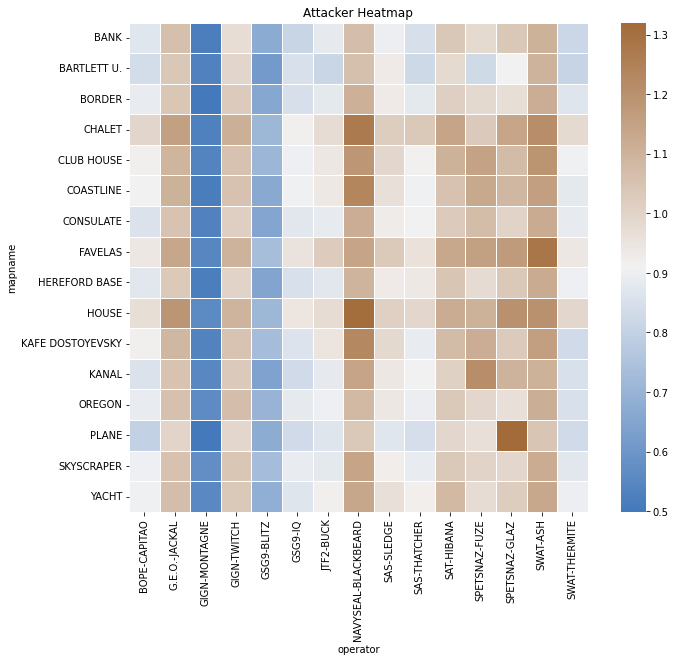

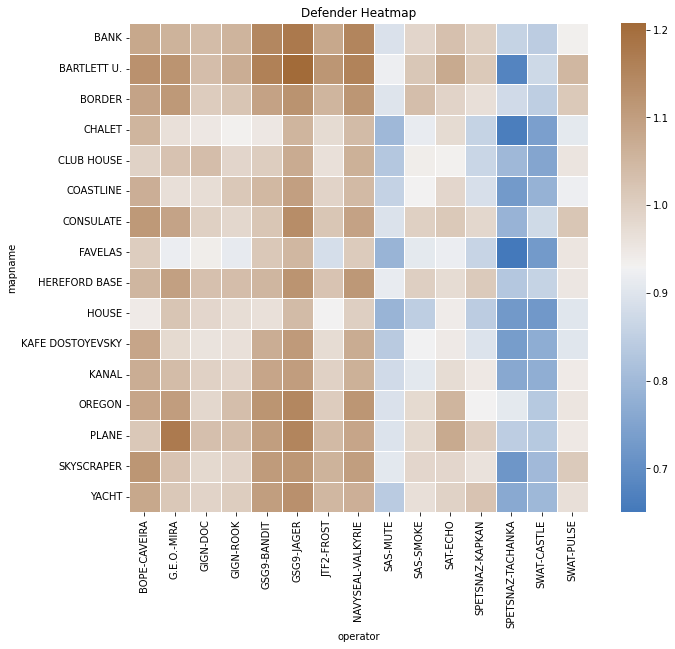

In [14]:
# Plotting the heat map again
for role, tbl in ques_1_role:
    pivot = tbl.pivot(index='mapname', columns='operator', values='kd_ratio')
    f, ax = plt.subplots(figsize=(12,9))
    plt.title(role + ' Heatmap')
    sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

### Finding the best lethal operator according to each map


BANK


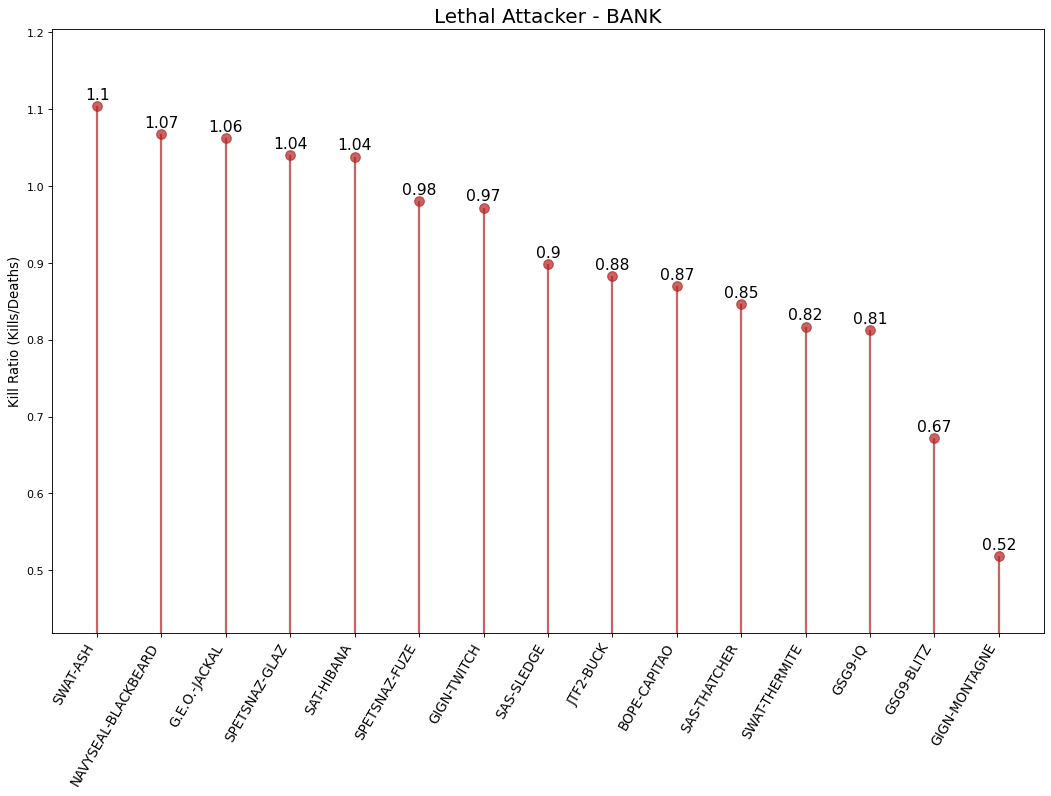

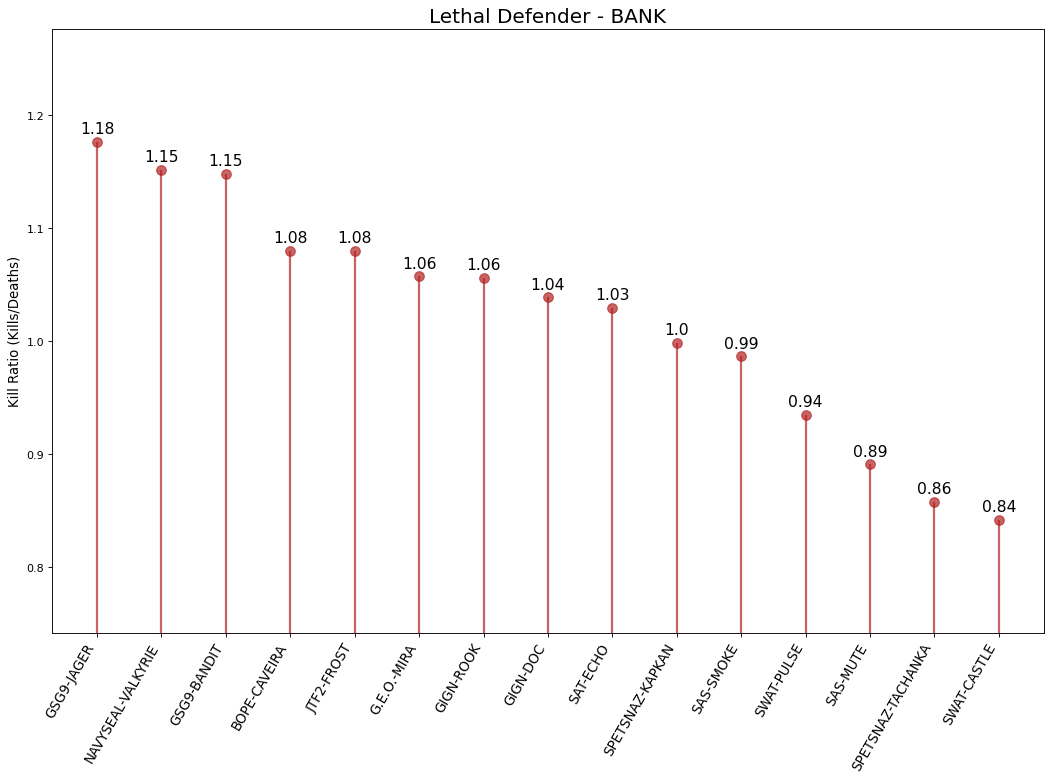

BARTLETT U.


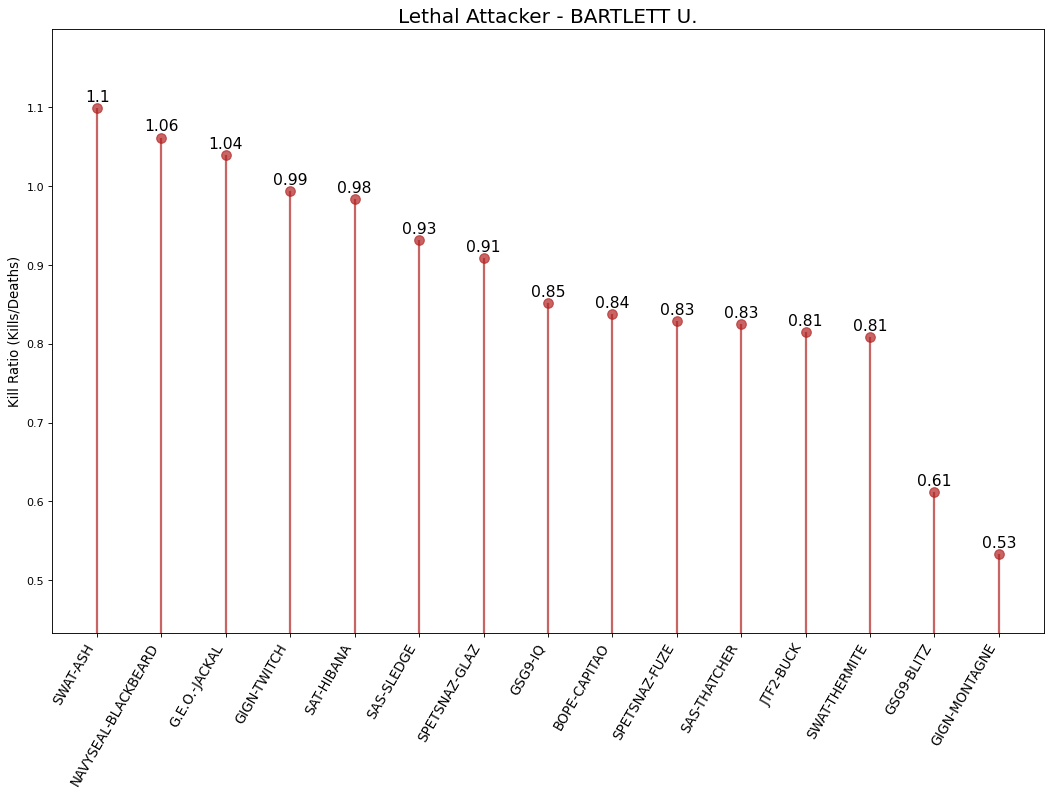

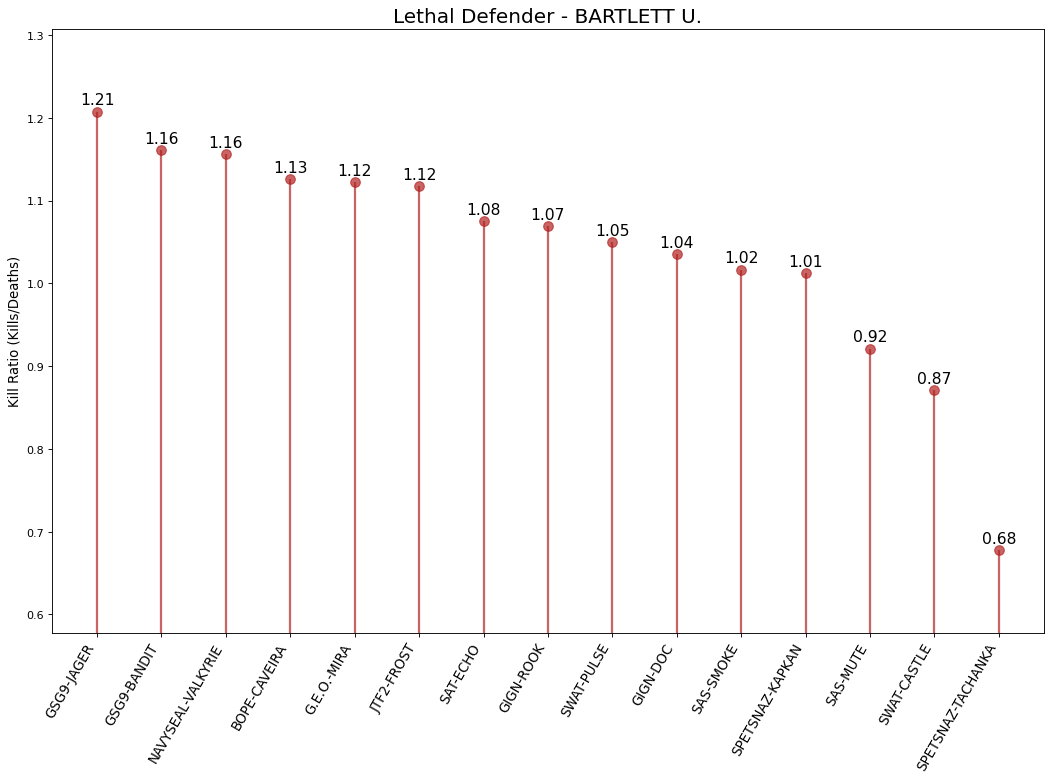

BORDER


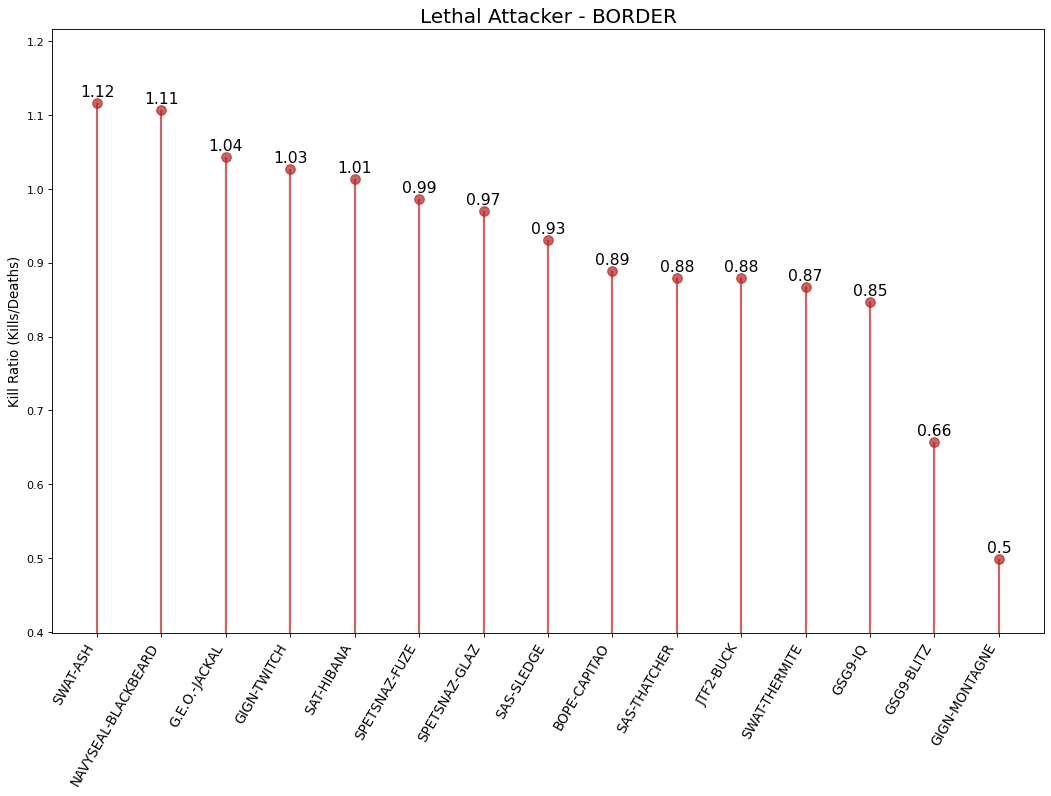

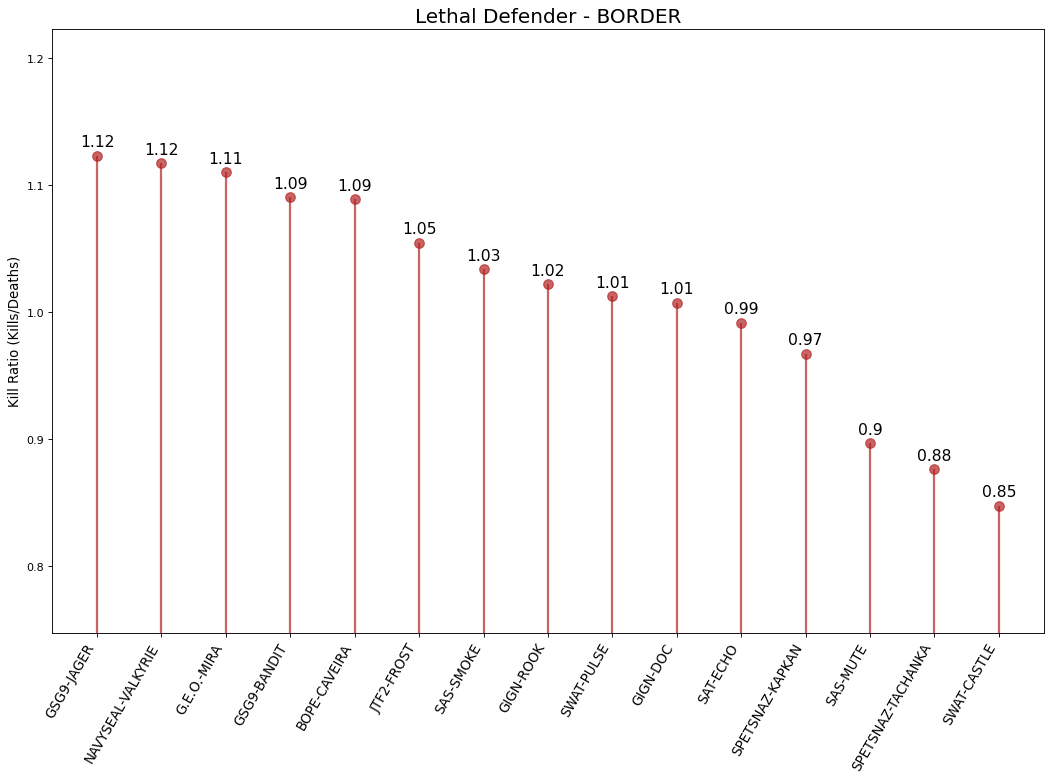

CHALET


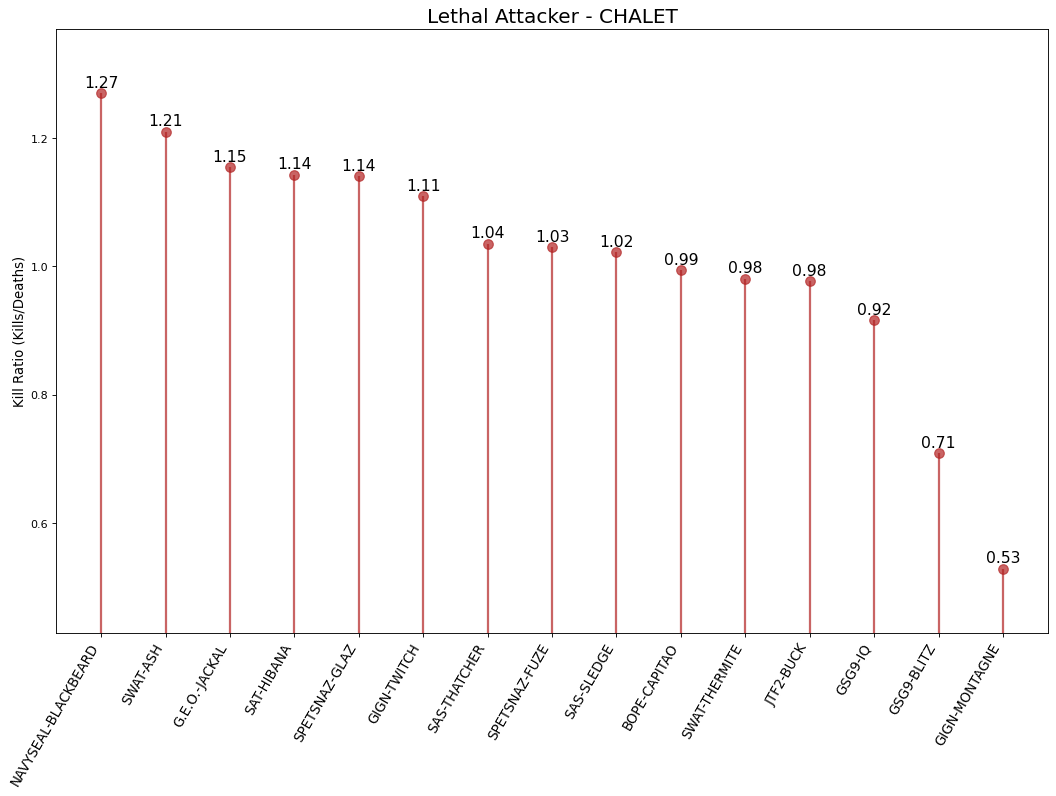

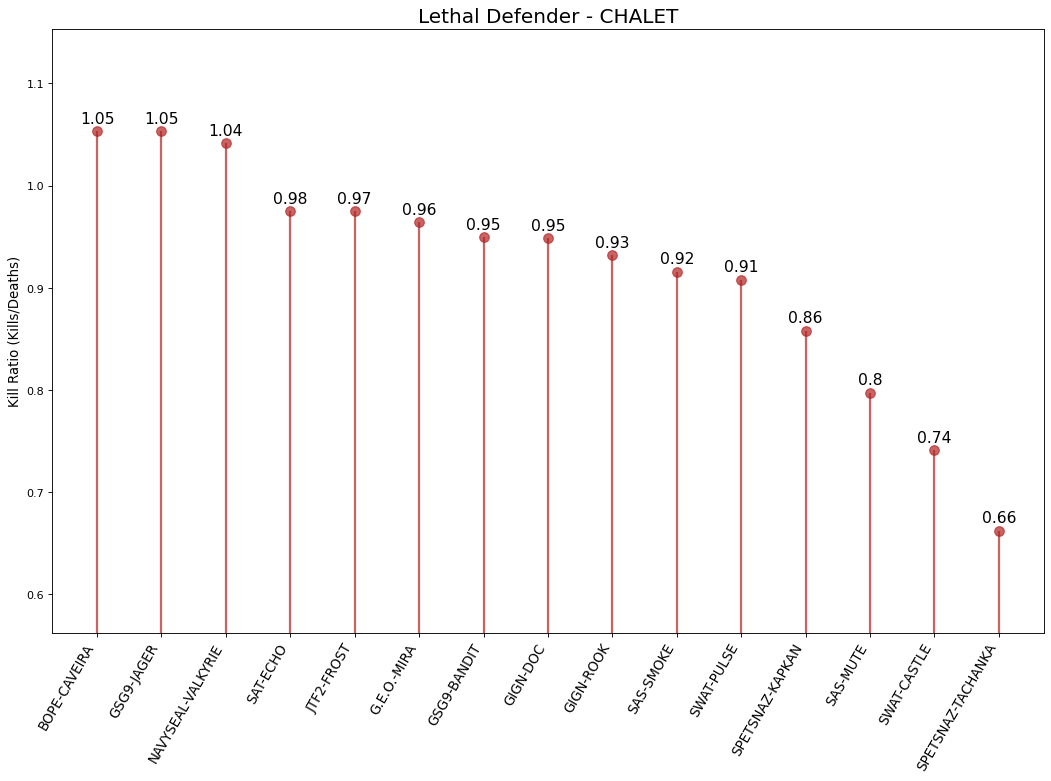

CLUB HOUSE


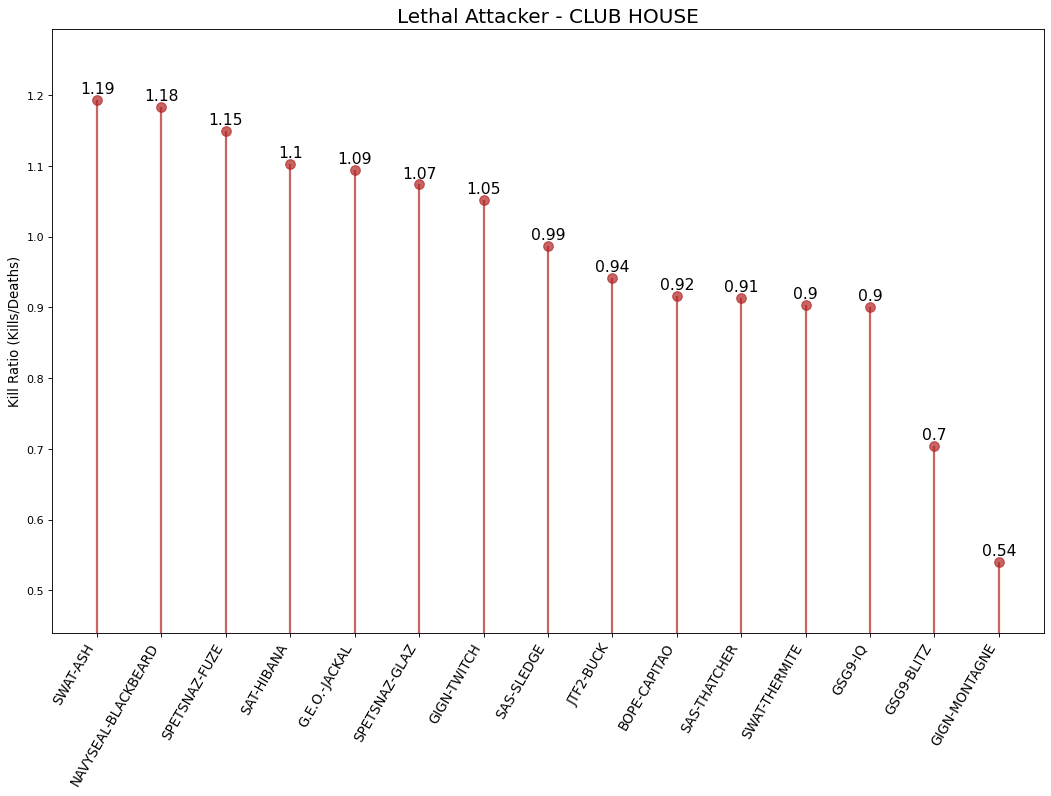

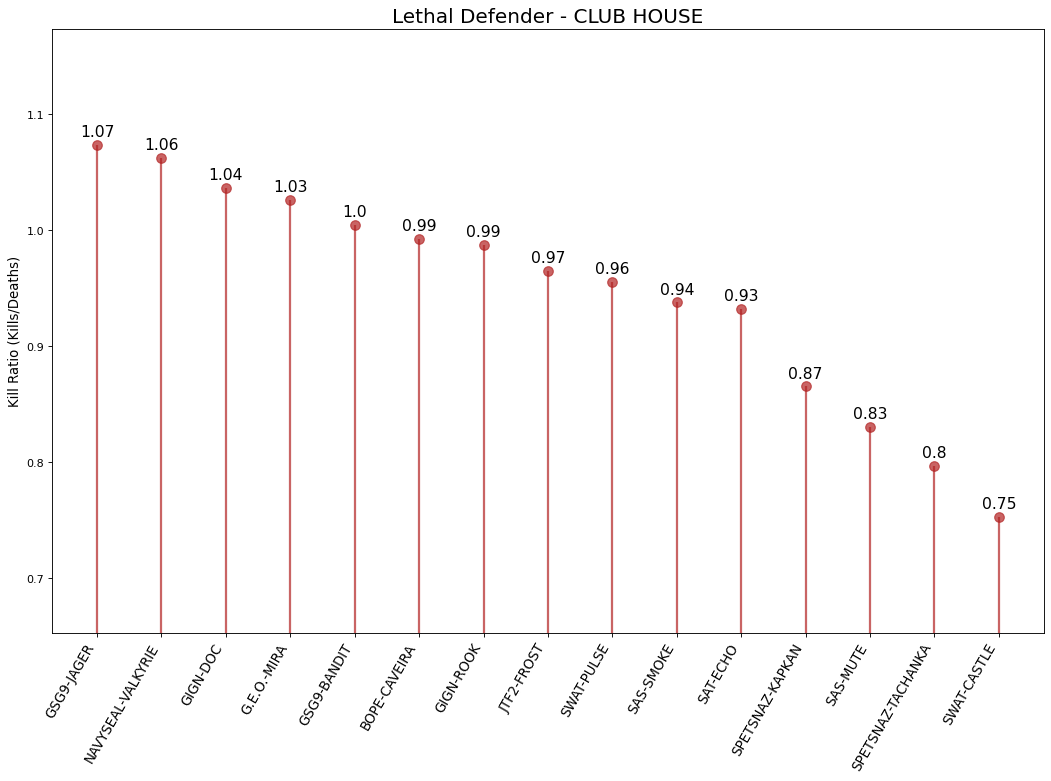

COASTLINE


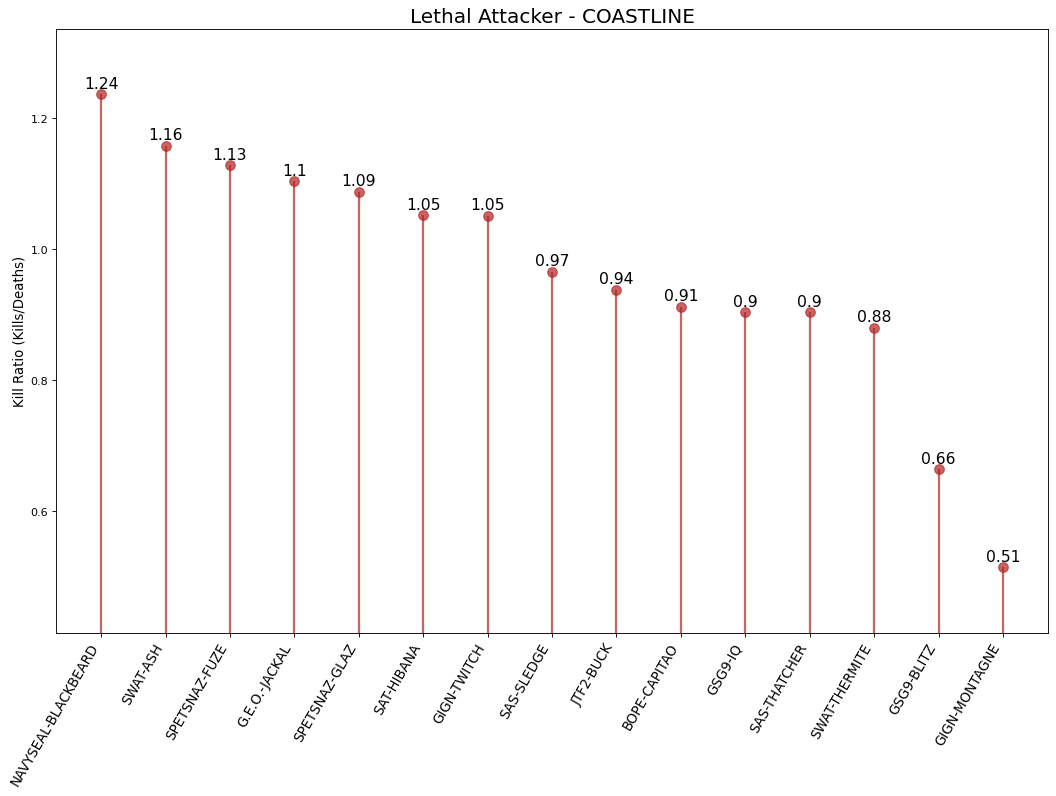

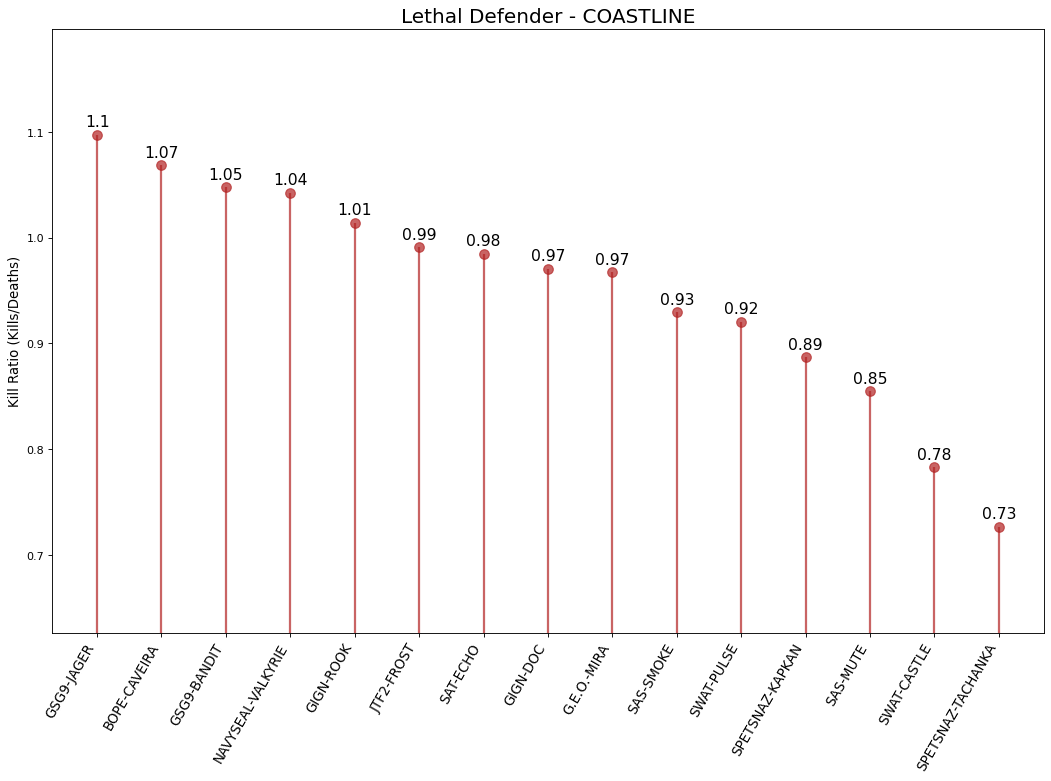

CONSULATE


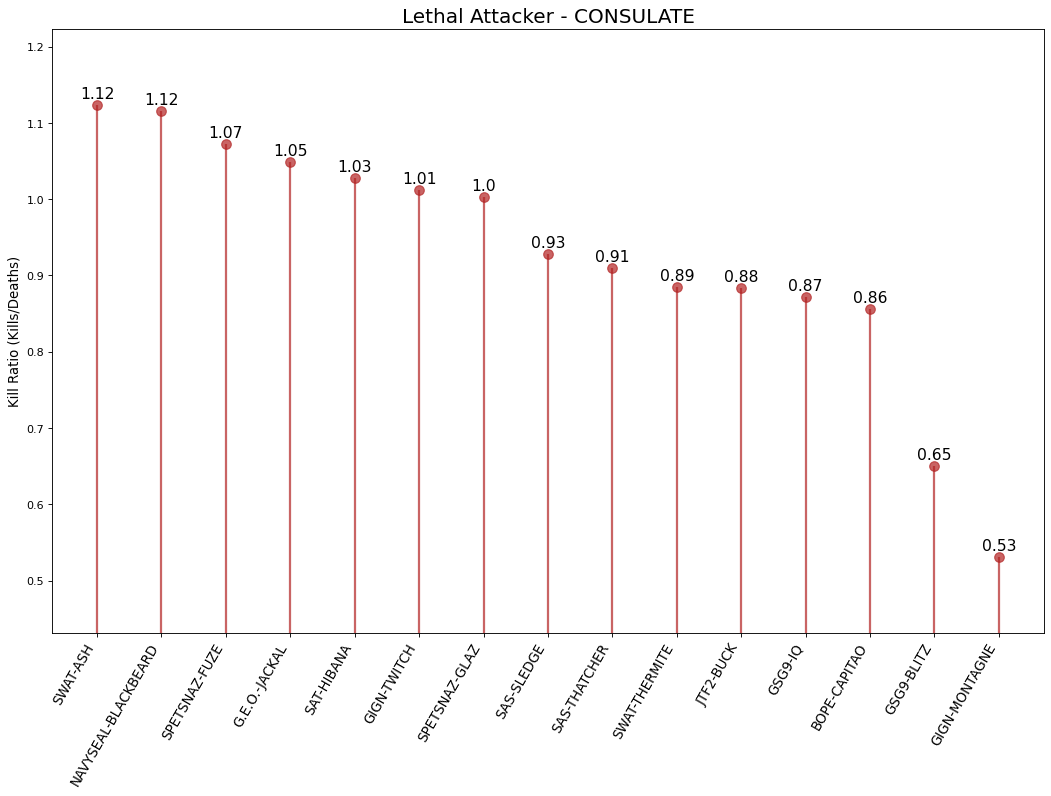

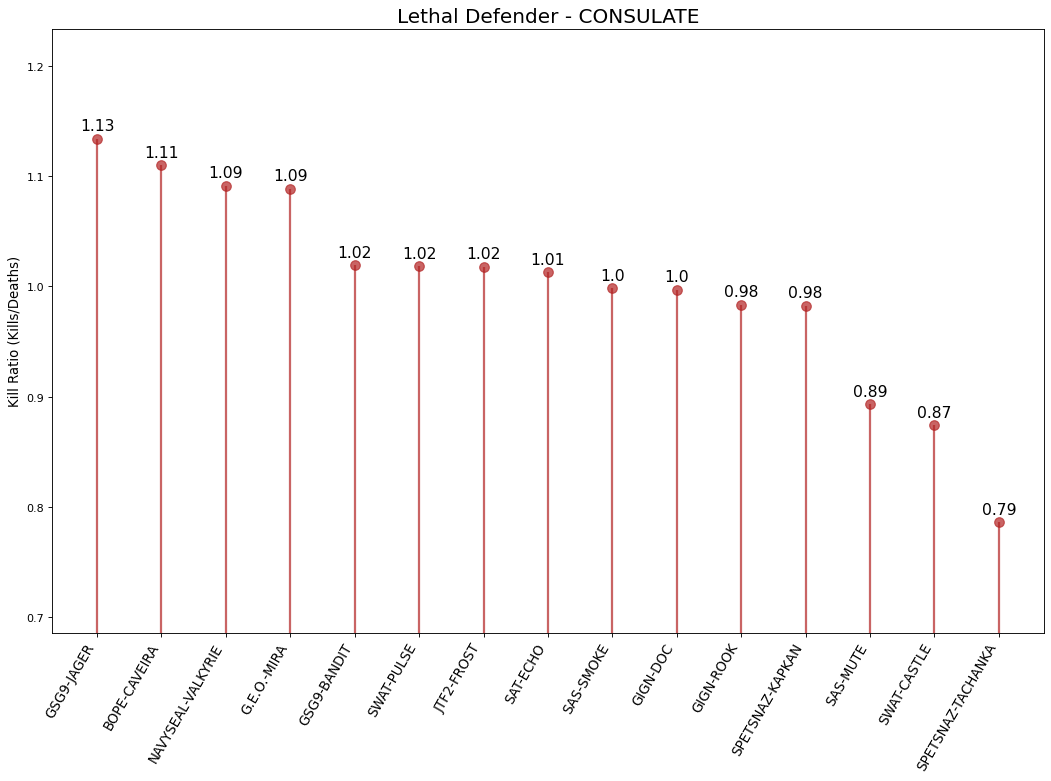

FAVELAS


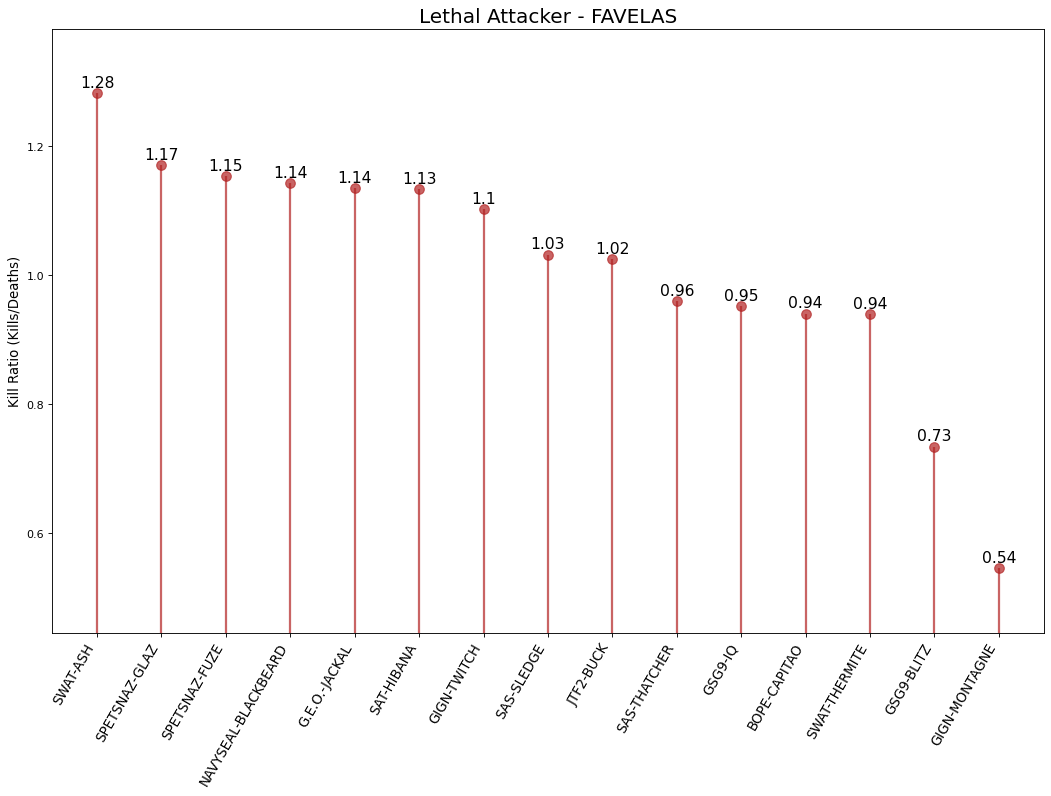

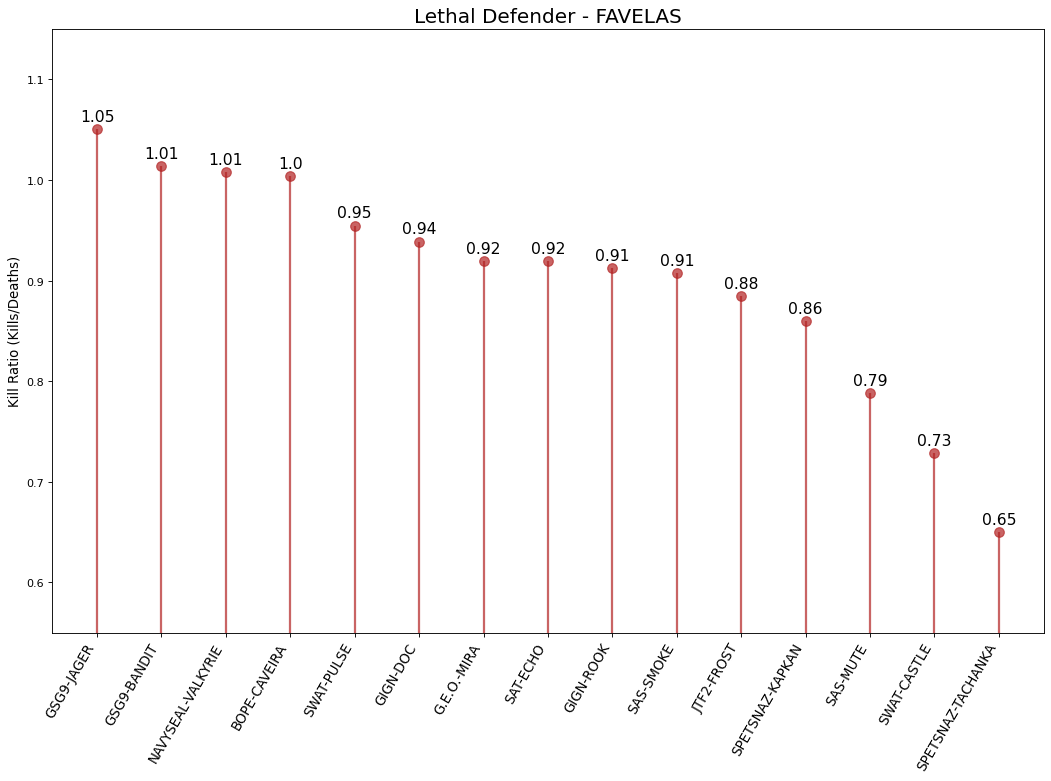

HEREFORD BASE


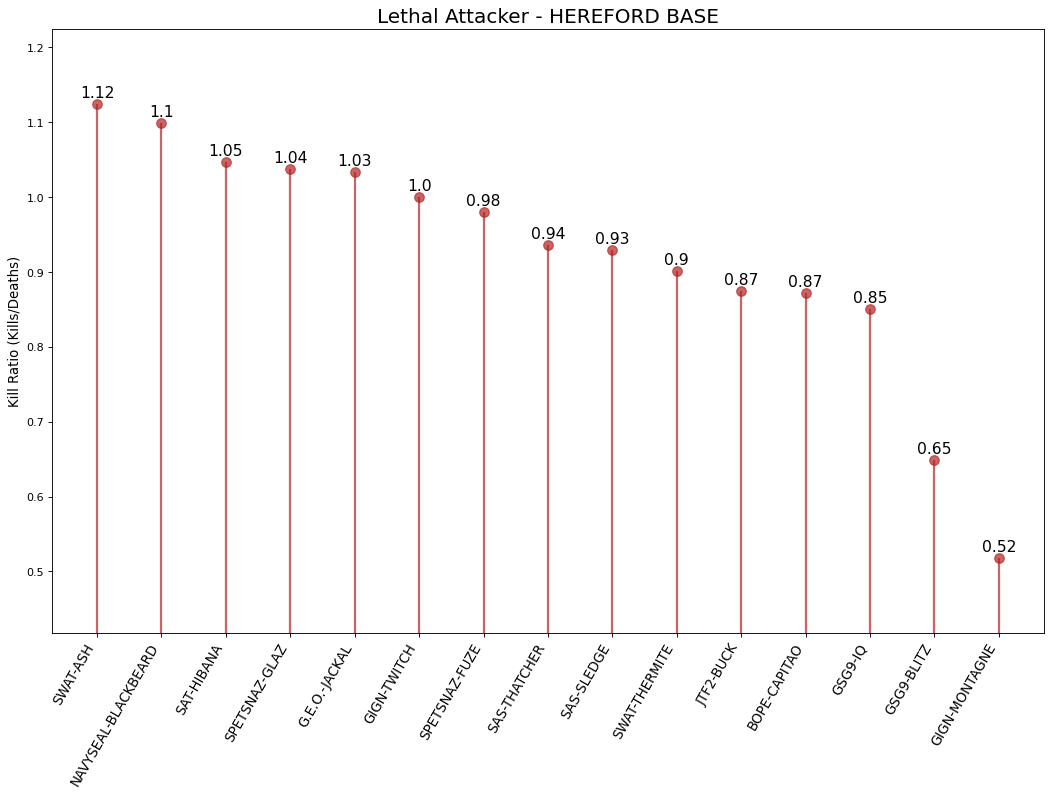

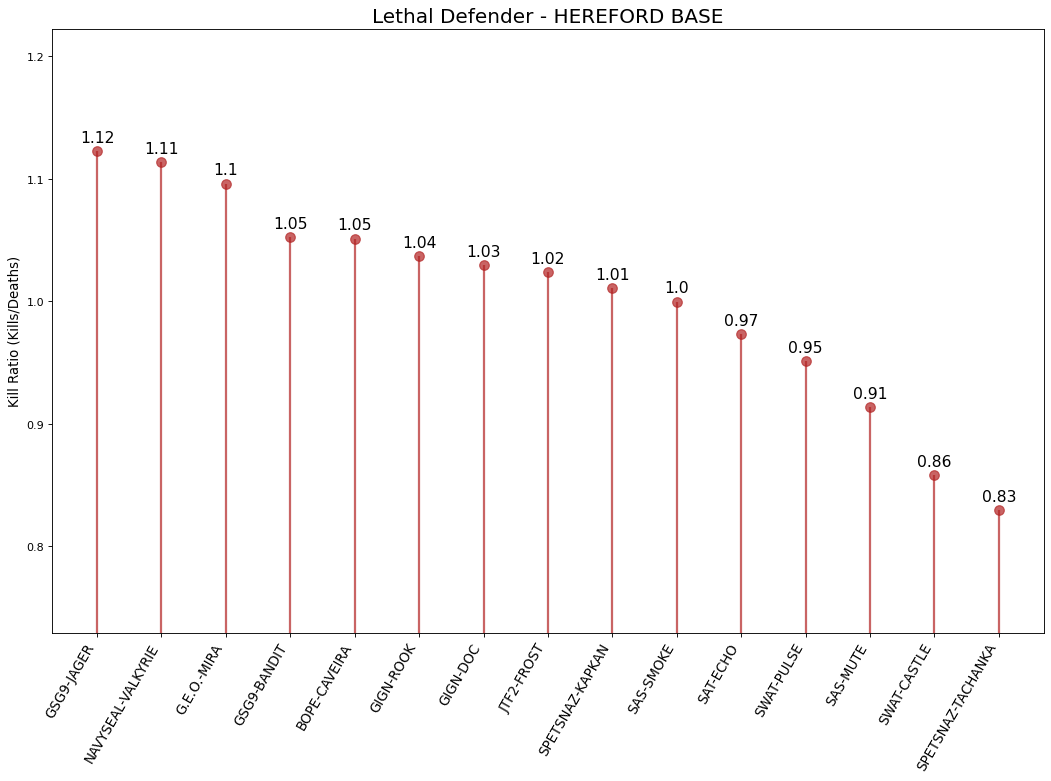

HOUSE


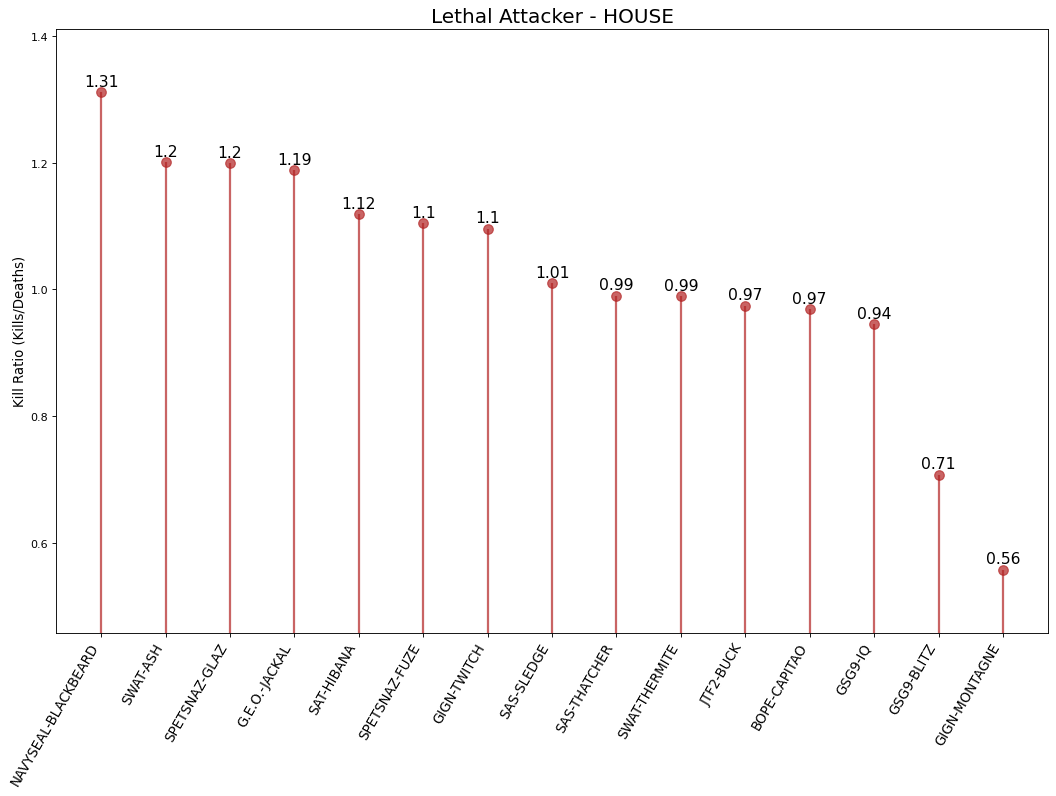

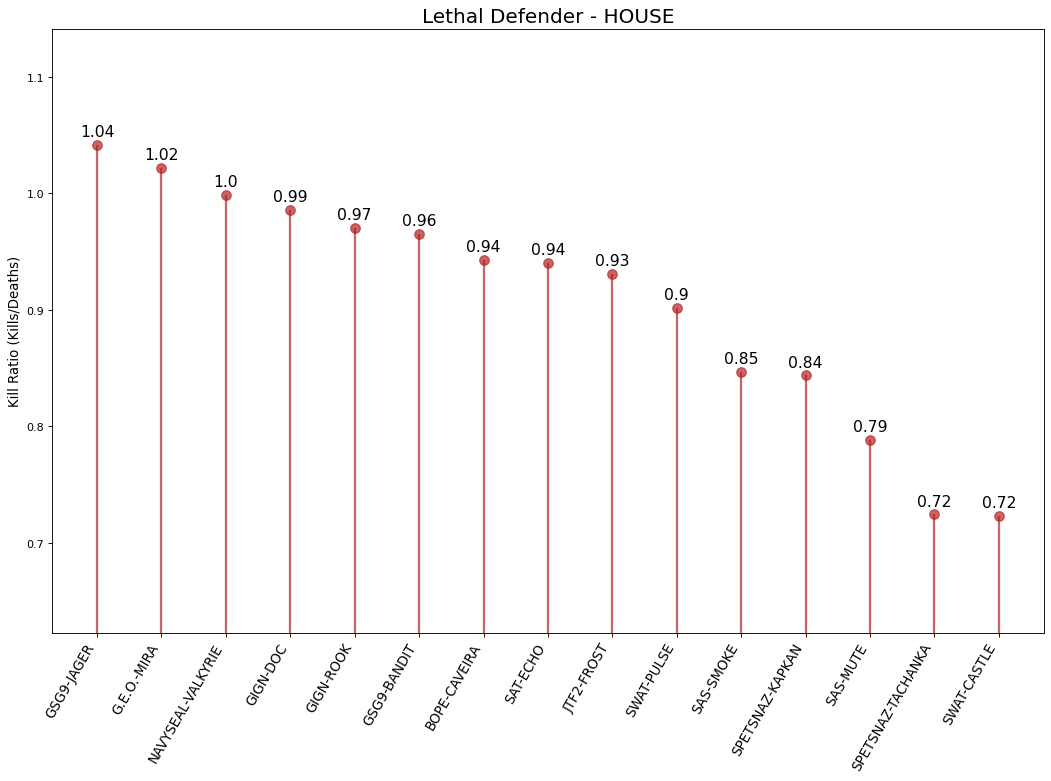

KAFE DOSTOYEVSKY


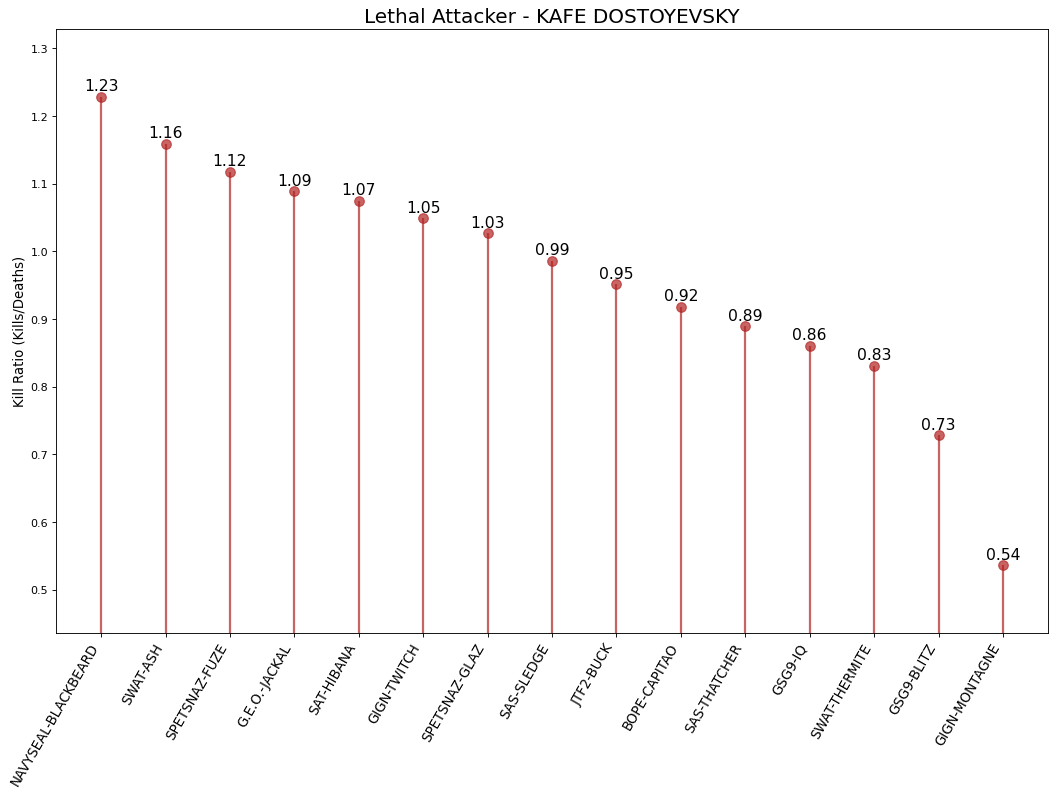

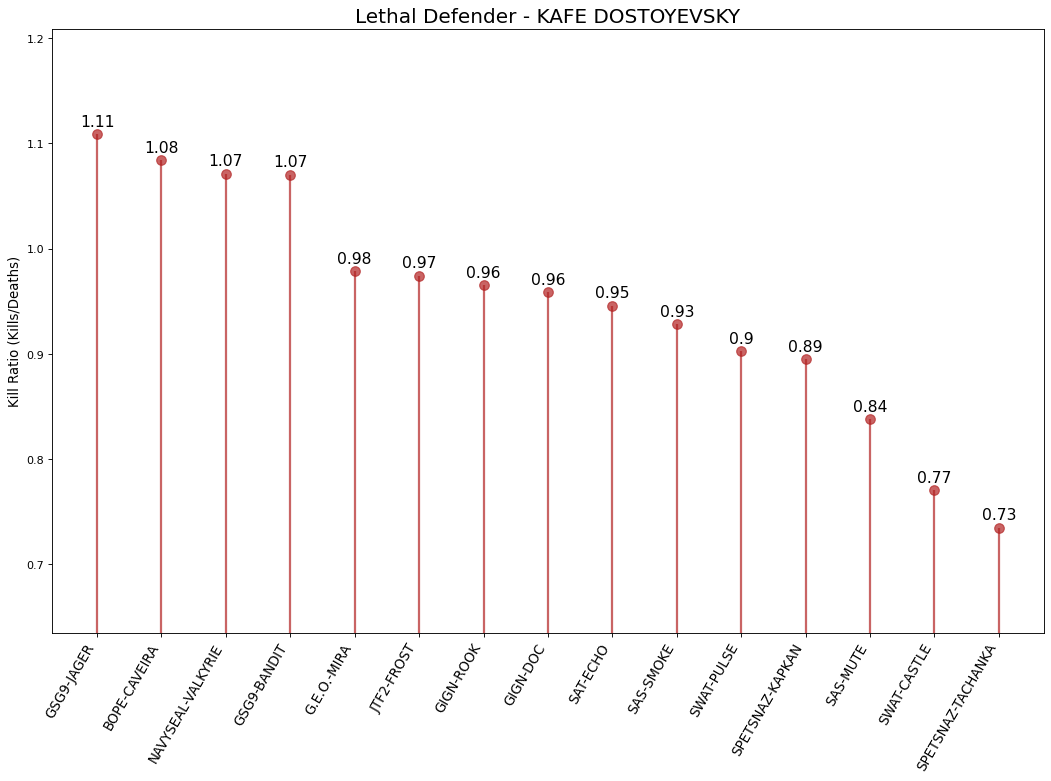

KANAL


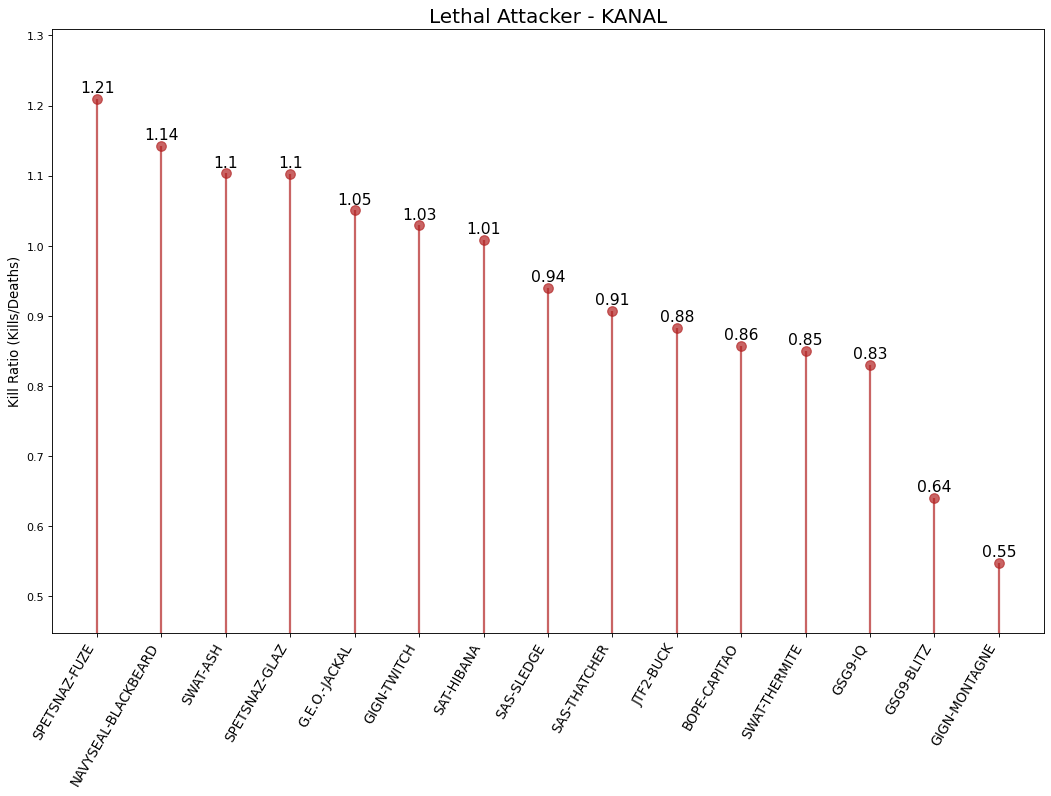

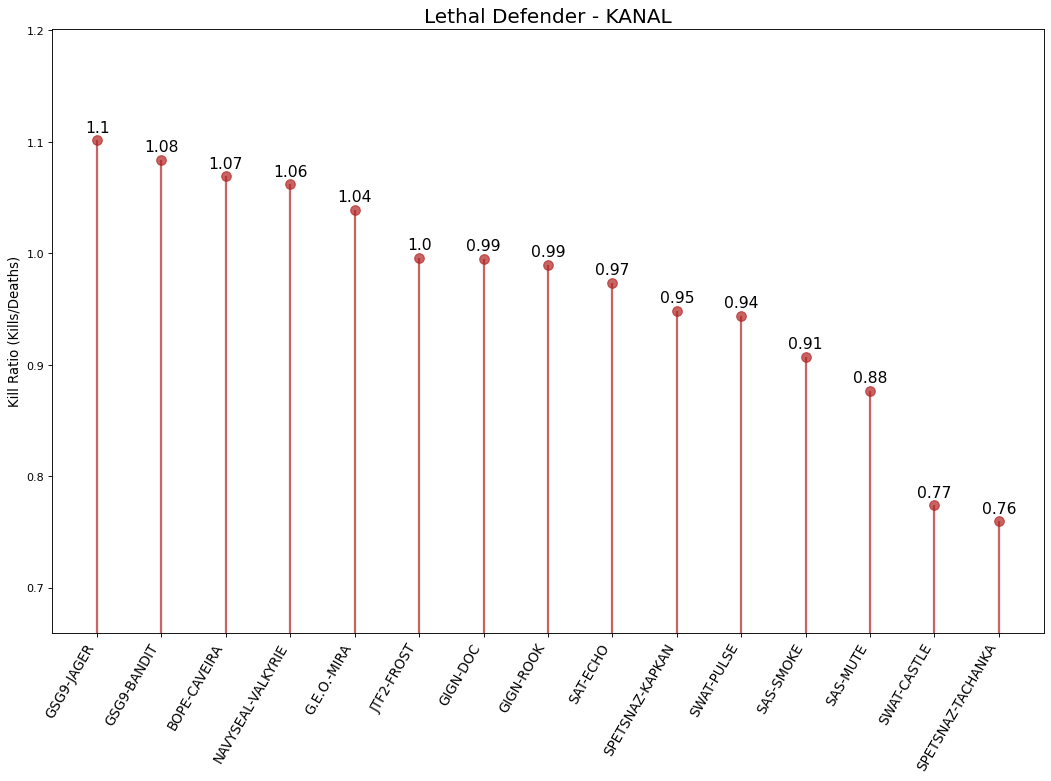

OREGON


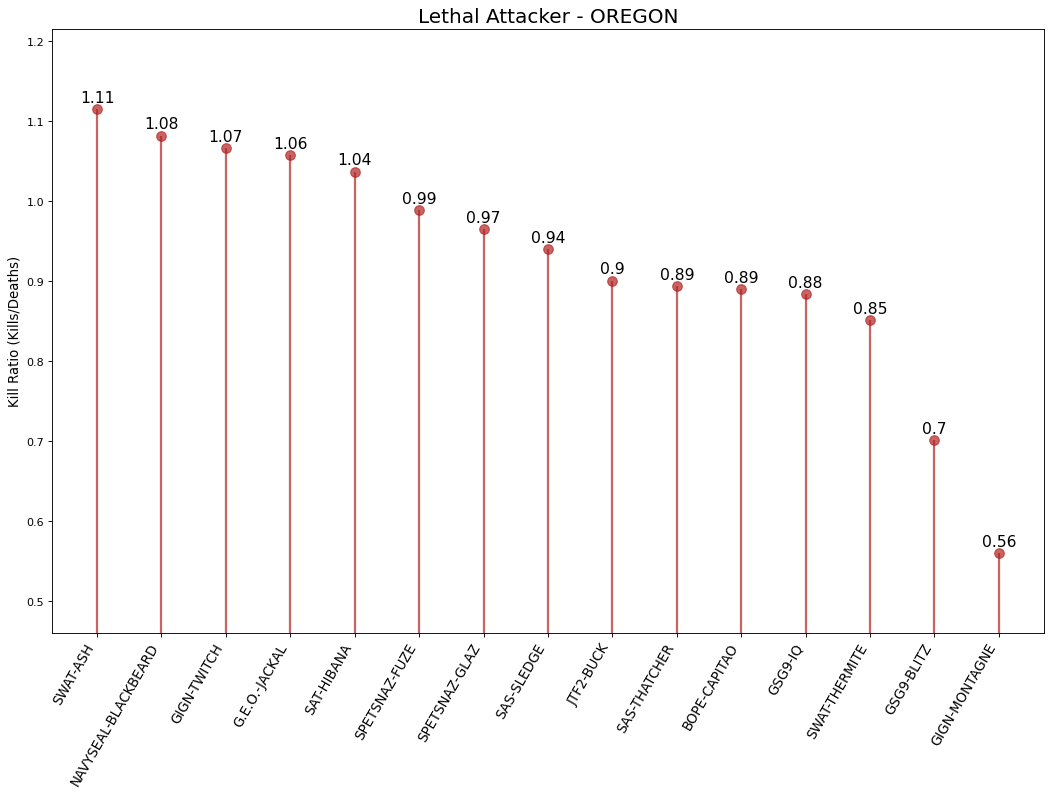

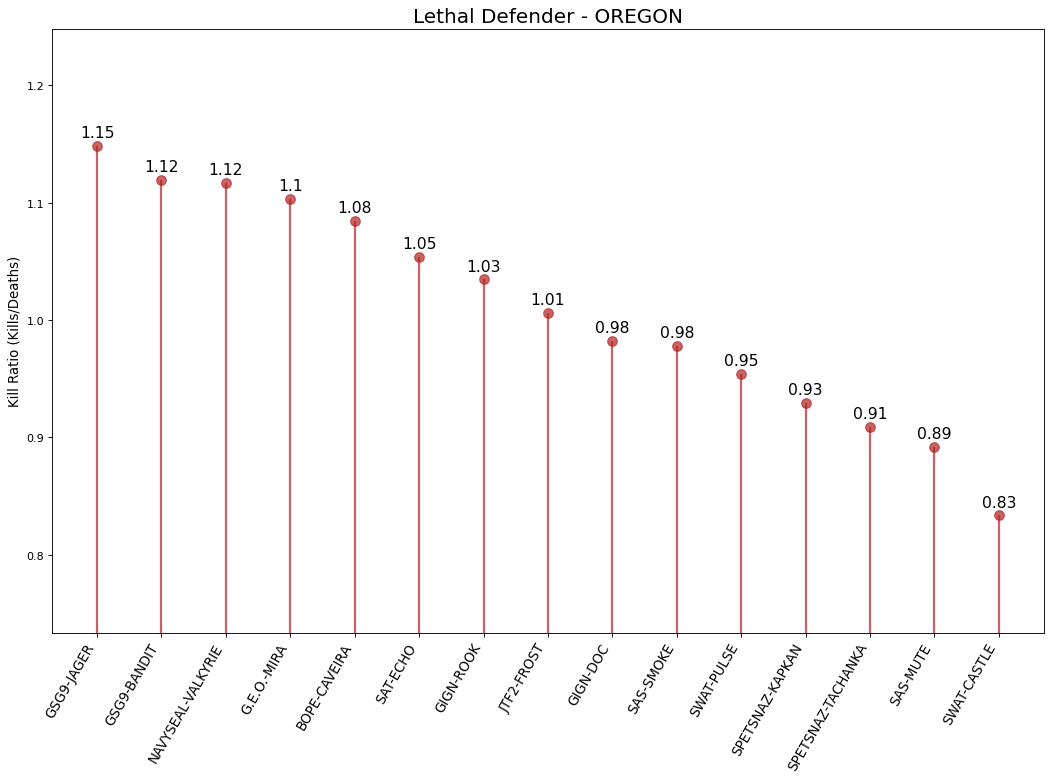

PLANE


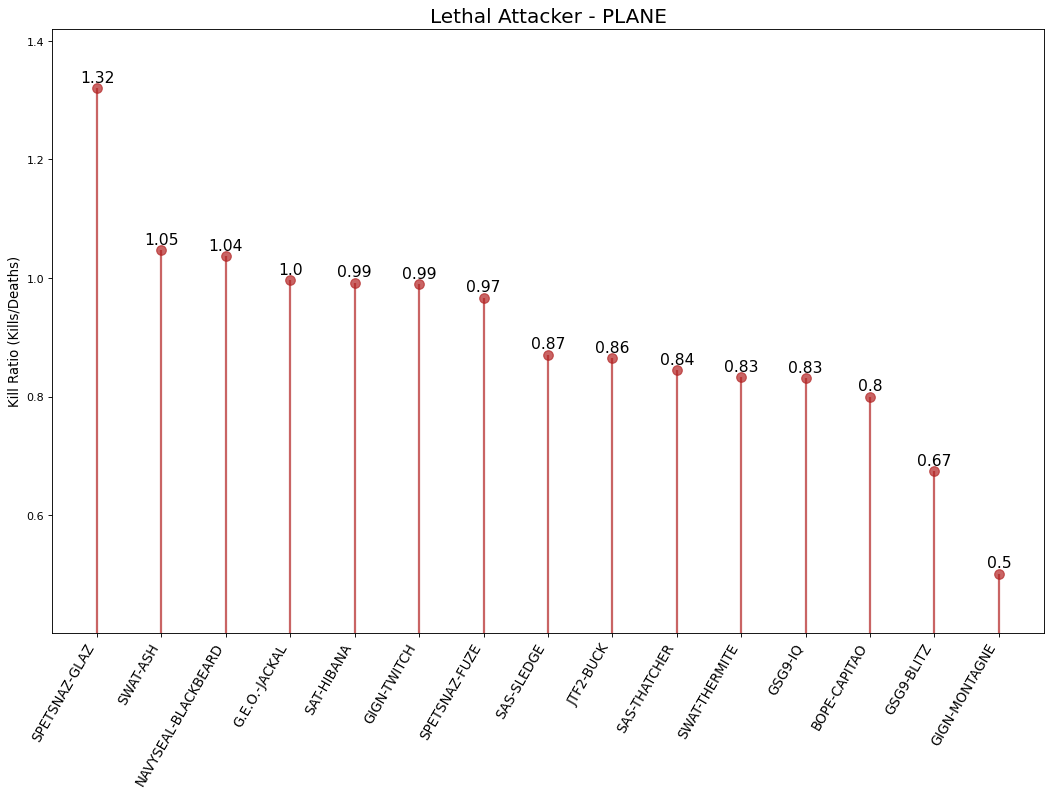

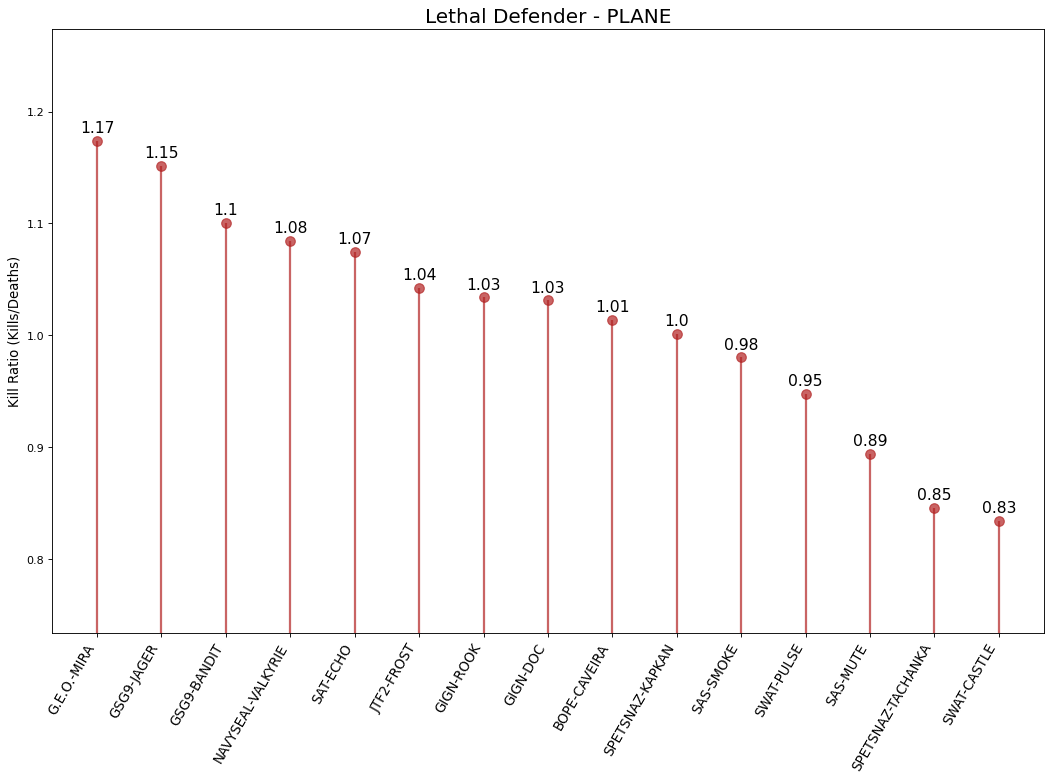

SKYSCRAPER


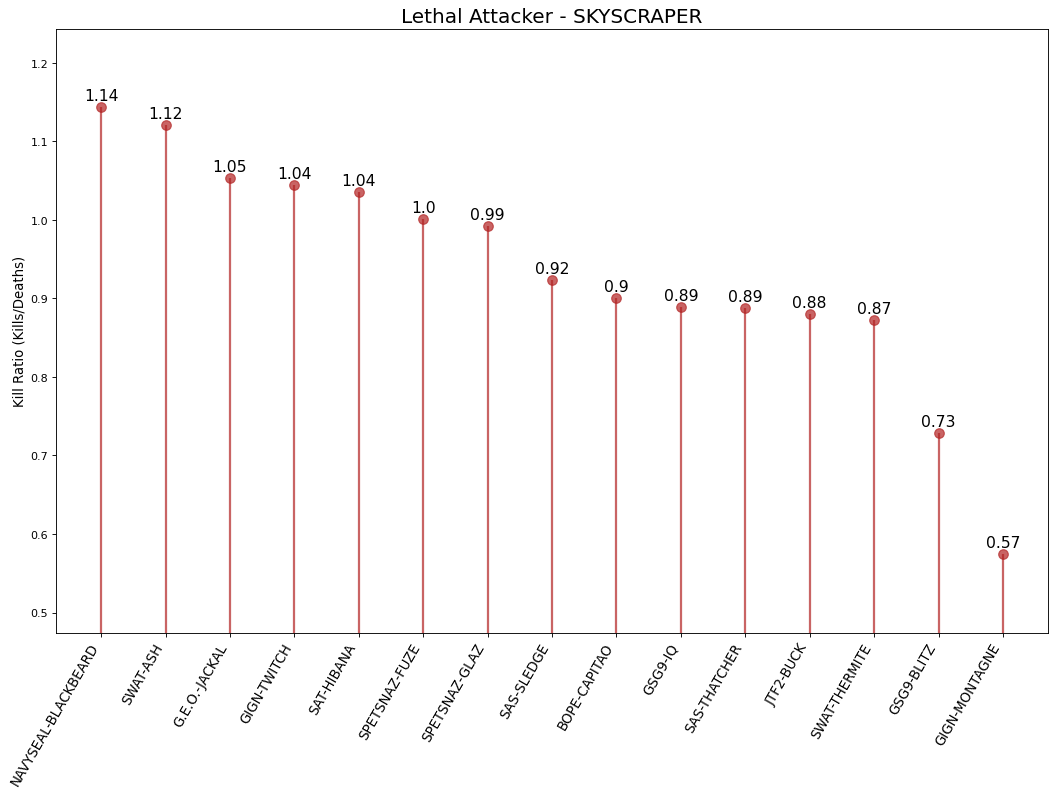

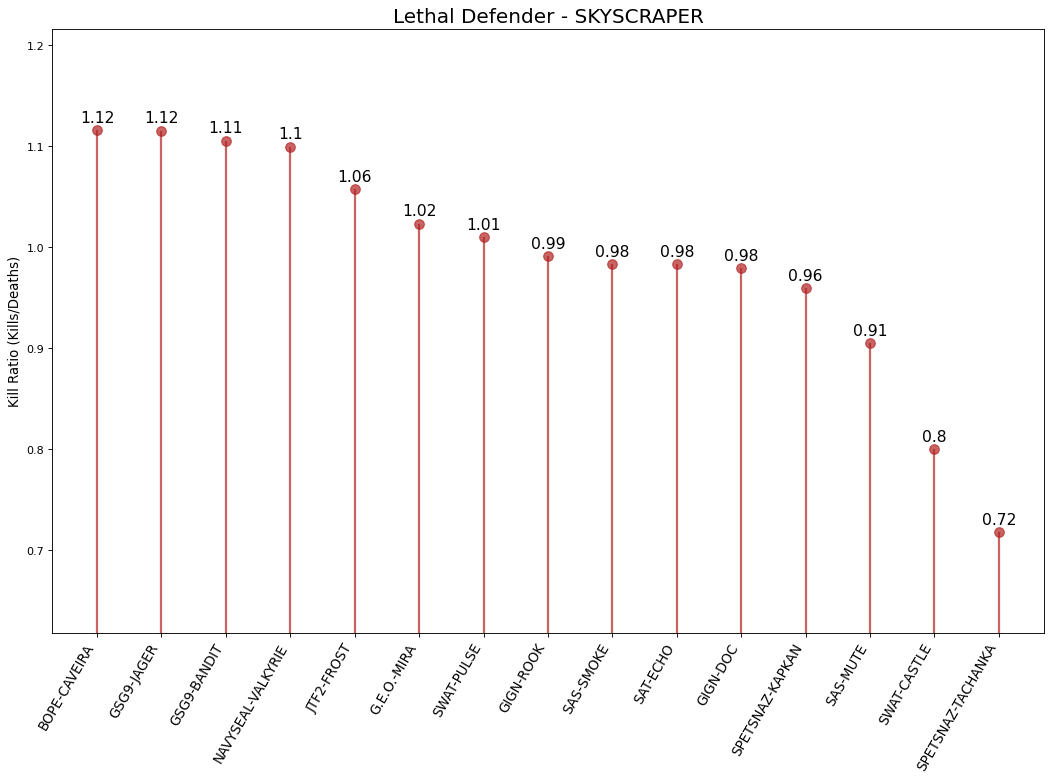

YACHT


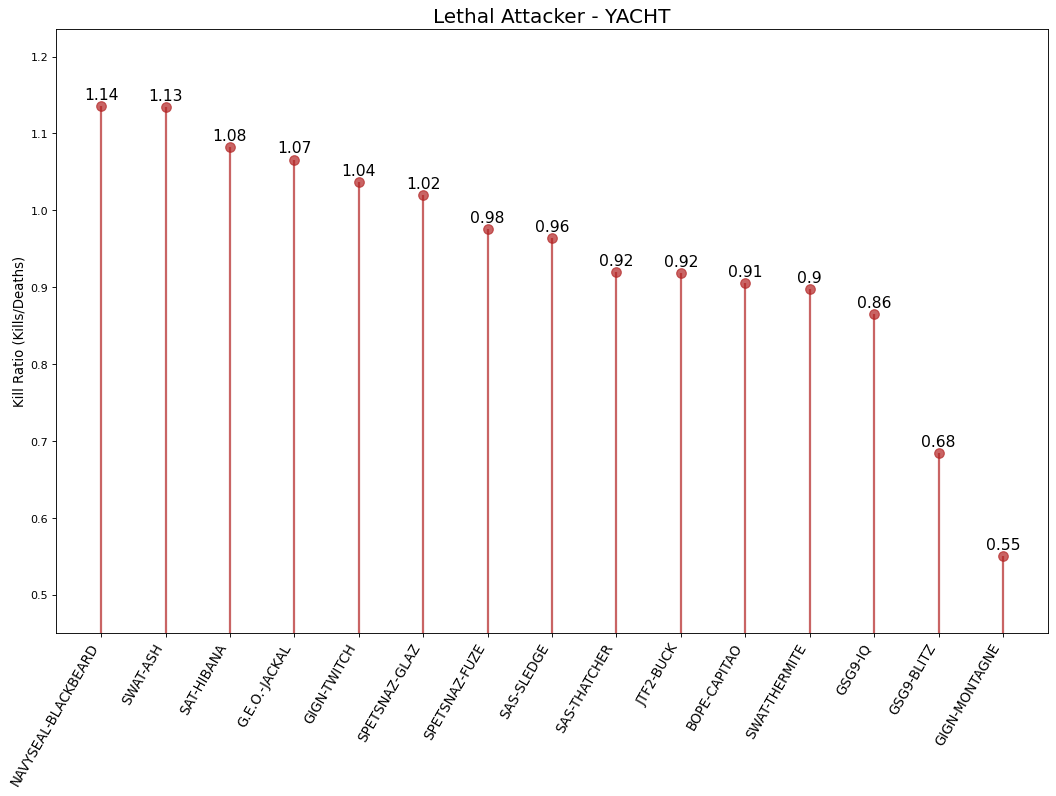

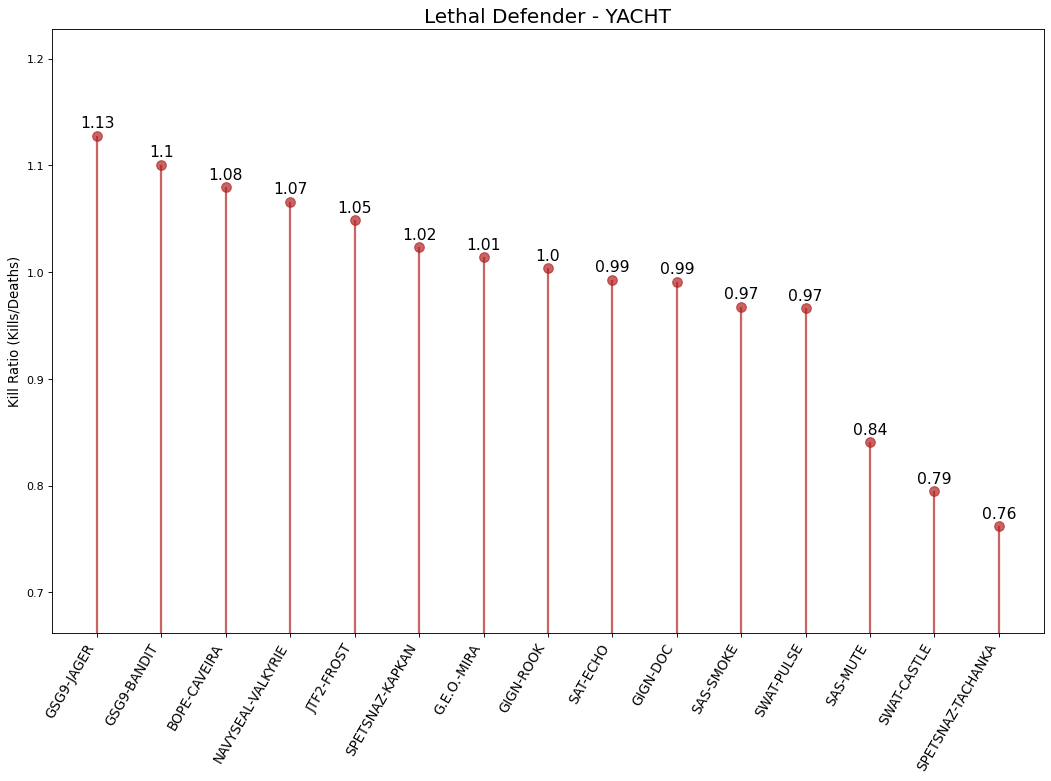

In [147]:
for map_name in ques_1.mapname.unique():
    print(map_name)
    ques_1_map = ques_1[ques_1['mapname'] == map_name]
    for i in ('Attacker','Defender'):
        #print(i)
        df = ques_1_map[ques_1_map.role == i].sort_values('kd_ratio',ascending = False)
        #print(df.role)
        fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
        ax.vlines(x=df.operator, ymin=0.1, ymax=df.kd_ratio, color='firebrick', alpha=0.7, linewidth=2)
        ax.scatter(x=df.operator, y=df.kd_ratio, s=75, color='firebrick', alpha=0.7)
        #print(i)
        # Title, Label, Ticks and Ylim
        ax.set_title('Lethal %s - %s' %(i,map_name), fontdict={'size':18})
        ax.set_ylabel('Kill Ratio (Kills/Deaths)',fontdict={'size':12})
        ax.set_xticks(df.operator)
        #ax.xticks(rotation = 45)
        ax.set_xticklabels(df.operator.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
        ax.set_ylim(df.kd_ratio.min()-0.1, df.kd_ratio.max() + 0.1)
        # Annotate
        for row in df.itertuples():
            ax.text(row.operator, row.kd_ratio+.005, s=round(row.kd_ratio, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
        #plt.savefig('C:\\Appuzzz\\University\\Sem 2\\Esports\\R6\\question1_figures\\%s_%s.png' %(map_name,i), bbox_inches='tight')
        plt.show()

## Checking for the top attackers and defenders

In [15]:
best_operator = ques_1.groupby(['role','operator'], as_index = False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

C:\Users\appu\AppData\Local\Temp/ipykernel_11548/143782106.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_operator = ques_1.groupby(['role','operator'], as_index = False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()


In [16]:
best_operator.head()

role       operator  nbwins  nbkills  nbdeaths  nbpicks
0  Attacker   BOPE-CAPITAO   33026    46113     51581    70612
1  Attacker  G.E.O.-JACKAL  116660   186997    174341   243312
2  Attacker  GIGN-MONTAGNE   48033    40612     76102   106272
3  Attacker    GIGN-TWITCH  116085   169219    163135   241359
4  Attacker     GSG9-BLITZ   19737    22794     33414    43538

In [17]:
#Dataframe for attacker role
best_attacker = best_operator[best_operator['role'] == 'Attacker']
best_attacker.head()


role       operator  nbwins  nbkills  nbdeaths  nbpicks
0  Attacker   BOPE-CAPITAO   33026    46113     51581    70612
1  Attacker  G.E.O.-JACKAL  116660   186997    174341   243312
2  Attacker  GIGN-MONTAGNE   48033    40612     76102   106272
3  Attacker    GIGN-TWITCH  116085   169219    163135   241359
4  Attacker     GSG9-BLITZ   19737    22794     33414    43538

In [18]:
#Dataframe for Defender role
best_defender = best_operator[best_operator['role'] == 'Defender']
best_defender
best_defender.reset_index(drop=True, inplace=True)

In [30]:
best_defender.head()

role      operator  nbwins  nbkills  nbdeaths  nbpicks
0  Defender  BOPE-CAVEIRA  110255   153977    144819   202100
1  Defender   G.E.O.-MIRA  122282   158812    151832   227551
2  Defender      GIGN-DOC   78192   100914    101388   147389
3  Defender     GIGN-ROOK  159966   196696    196939   290535
4  Defender   GSG9-BANDIT  134708   188802    178325   250057

In [19]:
#Finding the kill ratio for attackers
best_attacker['kd_ratio'] = pd.to_numeric(best_attacker['nbkills']) / pd.to_numeric(best_attacker['nbdeaths'])

C:\Users\appu\AppData\Local\Temp/ipykernel_11548/1818644658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_attacker['kd_ratio'] = pd.to_numeric(best_attacker['nbkills']) / pd.to_numeric(best_attacker['nbdeaths'])


In [20]:
best_attacker = best_attacker.sort_values('kd_ratio', ascending = False)
best_attacker

role             operator  nbwins  nbkills  nbdeaths  nbpicks  \
7   Attacker  NAVYSEAL-BLACKBEARD   66234   107956     94234   137926   
13  Attacker             SWAT-ASH  150491   255153    223523   312057   
12  Attacker        SPETSNAZ-GLAZ   67037   109697     99613   143377   
1   Attacker        G.E.O.-JACKAL  116660   186997    174341   243312   
10  Attacker           SAT-HIBANA  126543   189436    179396   260674   
11  Attacker        SPETSNAZ-FUZE  118946   189968    182075   253525   
3   Attacker          GIGN-TWITCH  116085   169219    163135   241359   
8   Attacker           SAS-SLEDGE   88214   130350    136902   186231   
9   Attacker         SAS-THATCHER   94361   126081    137402   196441   
6   Attacker            JTF2-BUCK   59178    83967     92163   125870   
0   Attacker         BOPE-CAPITAO   33026    46113     51581    70612   
14  Attacker        SWAT-THERMITE  114613   152887    172170   242260   
5   Attacker              GSG9-IQ   33774    46750     53505    73163   
4   Attacker           GSG9-BLITZ   19737    22794     33414    43538   
2   Attacker        GIGN-MONTAGNE   48033    40612     76102   106272   

    kd_ratio  
7   1.145616  
13  1.141507  
12  1.101232  
1   1.072593  
10  1.055966  
11  1.043350  
3   1.037294  
8   0.952141  
9   0.917607  
6   0.911071  
0   0.893992  
14  0.888000  
5   0.873750  
4   0.682169  
2   0.533652

In [21]:
#Kill ratio of defenders
best_defender['kd_ratio'] = pd.to_numeric(best_defender['nbkills']) / pd.to_numeric(best_defender['nbdeaths'])

C:\Users\appu\AppData\Local\Temp/ipykernel_11548/793717362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_defender['kd_ratio'] = pd.to_numeric(best_defender['nbkills']) / pd.to_numeric(best_defender['nbdeaths'])


In [22]:
best_defender = best_defender.sort_values('kd_ratio', ascending = False)
best_defender

role           operator  nbwins  nbkills  nbdeaths  nbpicks  kd_ratio
5   Defender         GSG9-JAGER  154608   226391    203338   285951  1.113373
7   Defender  NAVYSEAL-VALKYRIE  114472   156230    144629   209022  1.080212
0   Defender       BOPE-CAVEIRA  110255   153977    144819   202100  1.063238
4   Defender        GSG9-BANDIT  134708   188802    178325   250057  1.058752
1   Defender        G.E.O.-MIRA  122282   158812    151832   227551  1.045972
6   Defender         JTF2-FROST   95885   119639    118398   172232  1.010482
3   Defender          GIGN-ROOK  159966   196696    196939   290535  0.998766
2   Defender           GIGN-DOC   78192   100914    101388   147389  0.995325
10  Defender           SAT-ECHO   31871    38405     38735    59924  0.991481
14  Defender         SWAT-PULSE   77555   103509    107924   148223  0.959092
9   Defender          SAS-SMOKE   98970   126002    131666   186867  0.956982
11  Defender    SPETSNAZ-KAPKAN   58606    74782     79514   111677  0.940488
8   Defender           SAS-MUTE  120223   136574    158610   226362  0.861068
13  Defender        SWAT-CASTLE   53008    57969     72383   102242  0.800865
12  Defender  SPETSNAZ-TACHANKA   12923    14069     18207    25779  0.772725

In [23]:
# Overall plotting -Attacker
fig = px.bar(best_attacker, x = 'operator', y = 'kd_ratio', text_auto=True)
fig.update_yaxes(range=[0.45,1.2], title = "Kill Ratio (Kills/Deaths)")
fig.update_xaxes(title = "Operators")
fig.update_layout(title = "Top Attackers")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [24]:
# Overall plotting - Defender
fig = px.bar(best_defender, x = 'operator', y = 'kd_ratio', text_auto=True)
fig.update_yaxes(range=[0.6,1.2], title = "Kill Ratio (Kills/Deaths)")
fig.update_xaxes(title = "Operators")
fig.update_layout(title = "Top Defenders")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()